In [14]:
class Review:
    def __init__(self,text,score):
        self.text = text
        self.score = score
        self.sentiment = self.get_sentiment()

    def get_sentiment(self):
        if self.score <= 2:
            return "NEGATIVE"
        elif self.score == 3:
            return "NEUTRAL"
        else:
            return "POSITIVE"

class Sentiment:
    NEGATIVE = Sentiment.NEGATIVE
    NEUTRAL = Sentiment.NEUTRAL
    POSITIVE = Sentiment.POSITIVE

In [15]:
import json

LOAD DATA

In [ ]:
file_name = "./Books_small.json"
with open(file_name, "r") as f:
    for line in f:
        review = json.loads(line)
        print(review['reviewText'])        
        break


In [18]:
reviews = []
with open(file_name,"r") as f:
    for line in f:
        review = json.loads(line)
        reviews.append(Review(review["reviewText"], review["overall"]))
reviews[5].sentiment


'POSITIVE'

Bag of Words

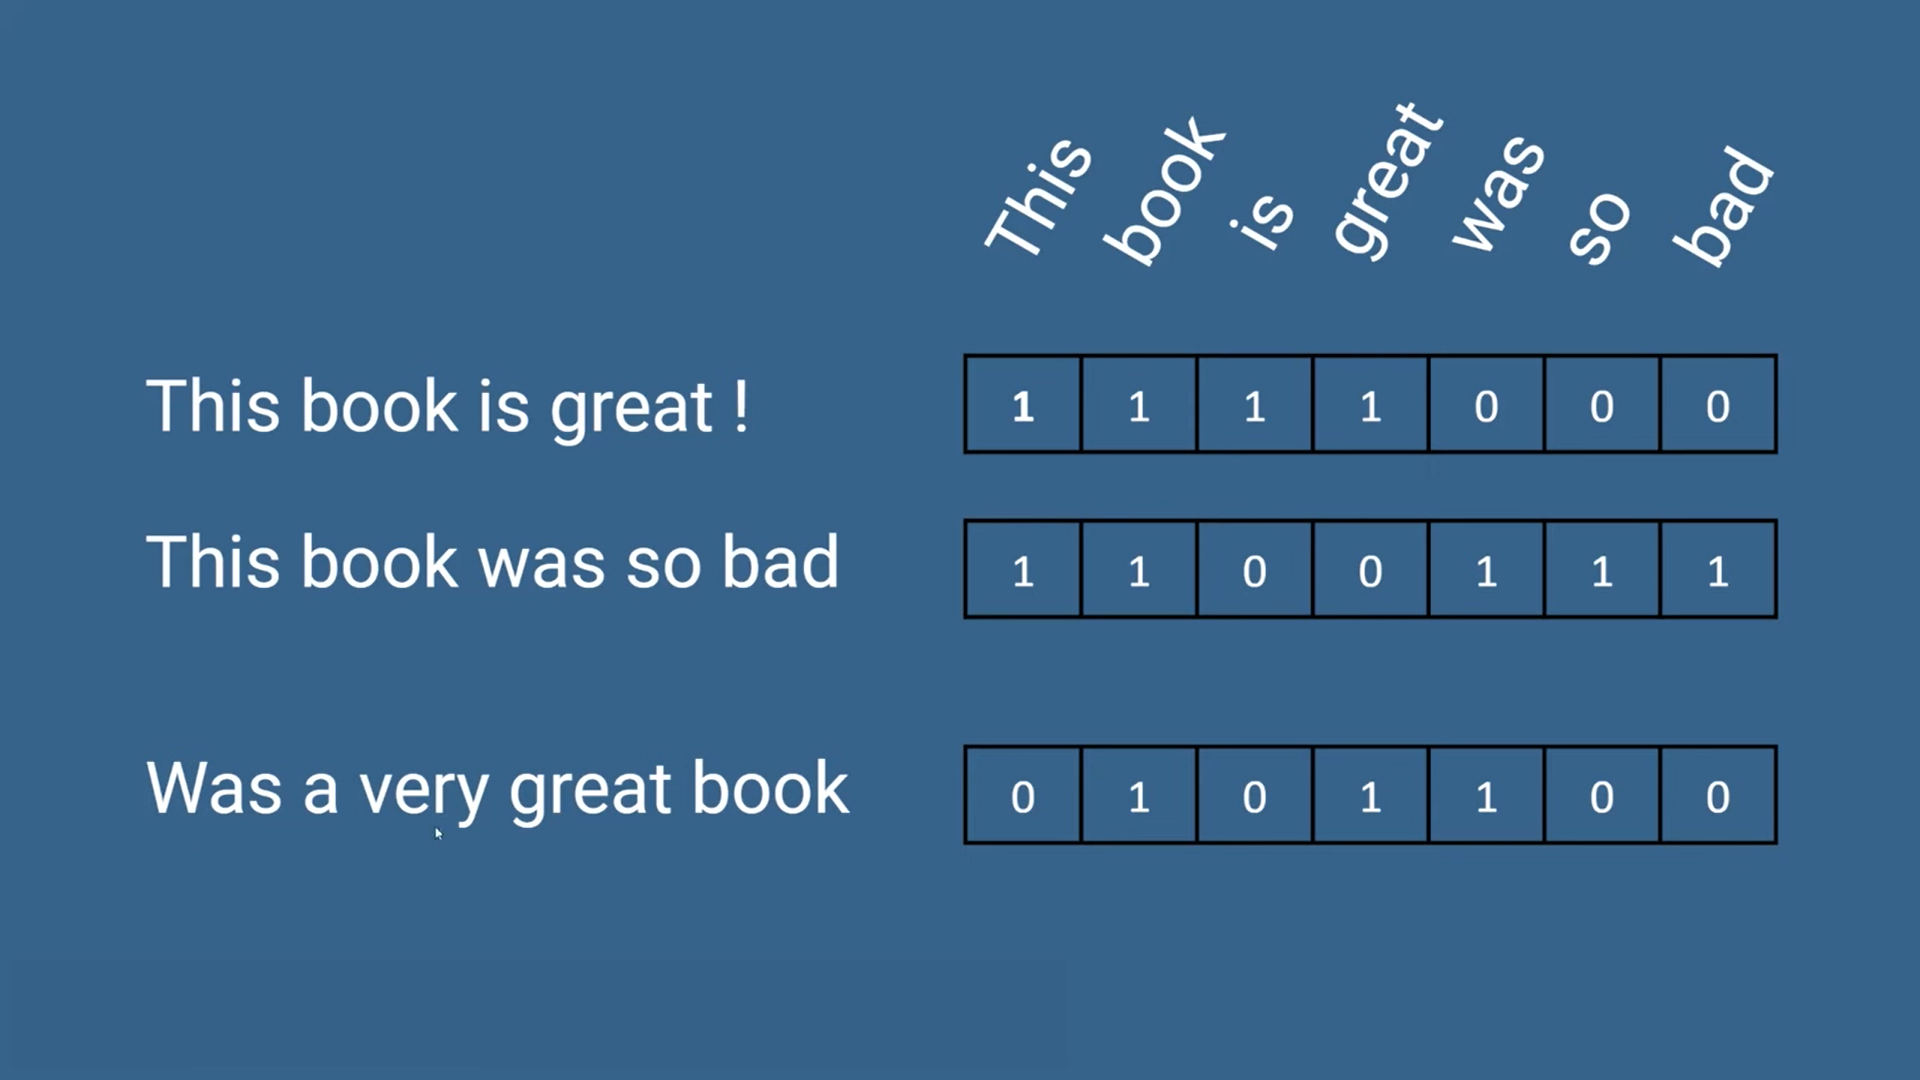

PREP DATA

In [23]:
from sklearn.model_selection import train_test_split

training, test = train_test_split(reviews,test_size=0.33, random_state=42)

In [28]:
len(test)

330

In [27]:
print(training[0].sentiment)

POSITIVE


In [31]:
train_x = [x.text for x in training]
train_y = [x.sentiment for x in training]

test_x = [x.text for x in test]
test_y = [x.sentiment for x in test]

BAG OF WORDS VECTORIZATION (CHANGING WORDS TO NUMBERS)

In [37]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
train_x_vectors = vectorizer.fit_transform(train_x)
test_x_vectors = vectorizer.transform(test_x)

# vectorizer.fit(train_x)
# train_x_vector = vectorizer.transform(train_x)
# test_x_vector = vectorizer.transform(test_x)

print(train_x[0])
print(train_x_vectors[0].toarray()) # its the bag of words for this piece of text with overall data

Vivid characters and descriptions. The author has created a tale that grabs your attention and I couldn't put it down.
[[0 0 0 ... 0 0 0]]


CLASSIFICATION

Linear SVM (Support Vector Machine)

In [39]:
from sklearn import svm

clf_svm = svm.SVC(kernel='linear') #svc = support vector classifier
clf_svm.fit(train_x_vectors, train_y)
print(test_x[0])
clf_svm.predict(test_x_vectors[0])

Every new Myke Cole book is better than the last, and this is no exception. If you haven't read the Shadow Ops series before start with Control Point, but go ahead and order Fortress Frontier and Breach Zone as well - you're going to want them.


array(['POSITIVE'], dtype='<U8')

Decision Tree

In [41]:
from sklearn.tree import DecisionTreeClassifier

clf_dec = DecisionTreeClassifier()
clf_dec.fit(train_x_vectors, train_y)
print(test_x[2])
clf_dec.predict(test_x_vectors[2])

Michael Cunningham mesmerizes with the thoughtful, elegant prose that is this book.  The reader becomes so close to its characters...the reader feels what these brothers feel.  Beautiful and tragic...a book that will stay with me for a long, long time.  Thank you again, Mr. Cunningham.  The Hours remains at the top of my list and The Snow Queen is another gift to your readers.


array(['POSITIVE'], dtype='<U8')

Naive Bayes

In [44]:
from sklearn.naive_bayes import GaussianNB

clf_gnb = DecisionTreeClassifier()
clf_gnb.fit(train_x_vectors, train_y)
print(test_x[11])
clf_gnb.predict(test_x_vectors[11])

Rocky Point SeriesBook 1This was a sweet book about Joe Kincaid who was widowed with a seven year old daughter and a brother who would rather race cars in Europe than stay in the small town.  It's also about newcomer, Gillian Parker, who just discovered she had a great grandmother who left her her estate.The story is fast paced and involves some mystery about someone who is causing &#34;accidents&#34; among the two main characters.  Gillian also helps Joe to loosen up on his parenting and give Jenny more space.  I really liked the characters in this book.  The mystery part is really pretty light and is resolved fairly simple, but sometimes that's good.  I do think the ending was a bit sudden...


array(['POSITIVE'], dtype='<U8')

Logistic Regression

In [46]:
from sklearn.linear_model import LogisticRegression

clf_log = LogisticRegression()
clf_log.fit(train_x_vectors,train_y)
print(test_x[22])
print(clf_log.predict(test_x_vectors[22]))


I love me some Mary B, excellent read with suspense throughout. Keep up the great work, waiting for next book.
['POSITIVE']
